### WQD7005: Data Mining
FINAL EXAMINATION (PART 2)<br>
    
-----------
Name: Muhammad Amirul bin Samsul Bahar<br>
ID: 17202062 (New) / WQD190041 (Old)

#### Question 3:
You are required to write code to create a decision tree (DT) model using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:

* Importing required libraries
* Loading Data
* Feature Selection
* Splitting Data
* Building Decision Tree Model
* Evaluating Model
* Visualizing Decision Trees

Previous data is not suitable for this scenario, thus new dataset is scrapped as follows:

#### Scrape data from website

In [156]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd

header = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive'}

url = "https://gist.github.com/curran/a08a1080b88344b0c8a7"
req = urllib.request.Request(url, headers=header)
html = urlopen(req).read()
soup_html = soup(html, 'html.parser')
data = soup_html.find(id="file-iris-csv").find_all("tr")

In [157]:
sepal_length = []
sepal_width = []
petal_length = []
petal_width = []
species = []
for i in data[1:]:
    a = i.findAll('td')
    sepal_length.append(a[1].text.strip())
    sepal_width.append(a[2].text.strip())
    petal_length.append(a[3].text.strip())
    petal_width.append(a[4].text.strip())
    species.append(a[5].text.strip())

In [166]:
df = pd.DataFrame(
    {
        'SepalLengthCm': sepal_length,
        'SepalWidthCm': sepal_width,
        'PetalLengthCm': petal_length,
        'PetalWidthCm': petal_width,
        'Species': species
    }
)

In [167]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  150 non-null    object
 1   SepalWidthCm   150 non-null    object
 2   PetalLengthCm  150 non-null    object
 3   PetalWidthCm   150 non-null    object
 4   Species        150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [169]:
for i in df.columns[:-1]:
    df[i] = pd.to_numeric(df[i])

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


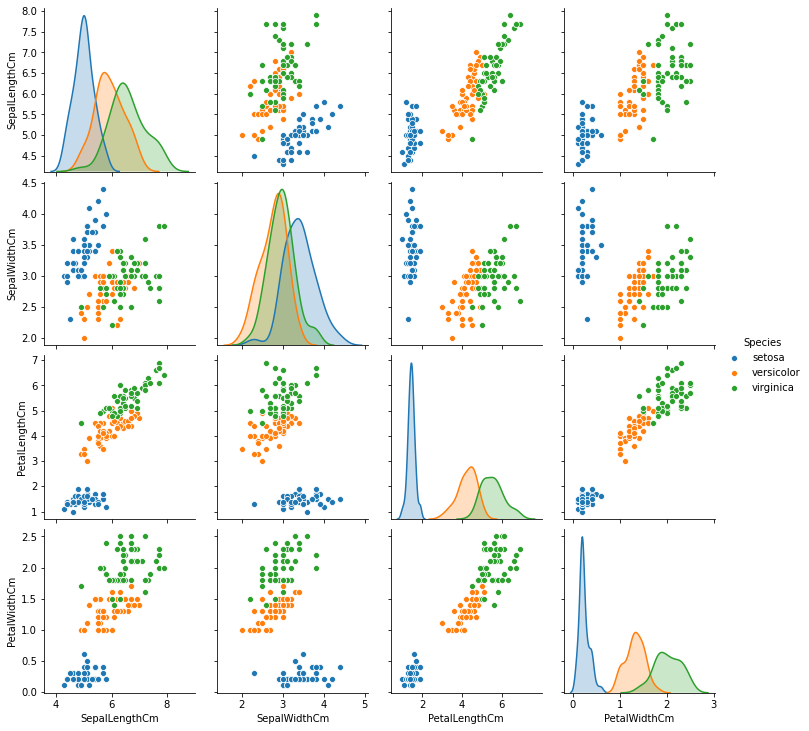

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Species')
plt.show()

In [183]:
df.Species = df.Species.map({
    'setosa':'0',
    'versicolor':'1',
    'virginica':'2'
})

In [184]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1]:
import seaborn as sns
sns.heatmap(df1.corr())
plt.show()

NameError: name 'df1' is not defined

#### Splitting the data

In [185]:
from sklearn.model_selection import train_test_split
all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

train_inputs, test_inputs, train_classes, test_classes = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

#### Modelling decision tree

In [237]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier()

#### Evaluating decision tree

In [238]:
print("The accuracy for the model is: "+str(dtc.score(test_inputs, test_classes)))

The accuracy for the model is: 0.9555555555555556


In [ ]:
from 

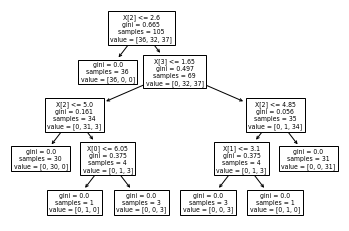

In [188]:
tree.plot_tree(dtc)
plt.show()

#### Question 4:
You are required to write code to find frequent itemsets using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:

* Importing required libraries
* Creating a list from dataset (Question 1)
* Convert list to dataframe with boolean values
* Find frequently occurring itemsets using Apriori Algorithm
* Find frequently occurring itemsets using F-P Growth
* Mine the Association Rules


Previous data is not suitable for this scenario, thus, new dataset is scraped as follows:
#### Crawl data from website

In [194]:
# Import all the libraries needed
from selenium import webdriver
from bs4 import BeautifulSoup as Soup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np

url = "https://www.kaggle.com/irfanasrullah/groceries"
# Setting the webdriver
browser = webdriver.Chrome("C:\\Users\Lenovo\Documents\Amir\Others\chromedriver_win32\chromedriver.exe")
browser.get(url)

# Wait for a ceratin class to appear
try:
    elem = WebDriverWait(browser, 30).until(
        ec.presence_of_element_located((By.CLASS_NAME, "sc-fzqAbL"))
    )
    soup = Soup(browser.page_source, "html.parser")
except:
    print("website takes too long")
finally:
    browser.quit()

# Find the element that the data located
div = soup.find("div", {"class":"sc-jSglzX"})
span = div.findAll("span", {"class":"sc-fzqAbL"})

Extract the data from the BeautifulSoup object:

In [195]:
a = []
for i in span:
    b = i.findAll("div")
    a.append(b)
number_item = []
item_1 = []
item_2 = []
item_3 = []
item_4 = []
item_5 = []
item_6 = []
item_7 = []
item_8 = []
item_9 = []
for i in a:
    number_item.append(i[1].text.strip())
    item_1.append(i[2].text.strip())
    item_2.append(i[3].text.strip())
    item_3.append(i[4].text.strip())
    item_4.append(i[5].text.strip())
    item_5.append(i[6].text.strip())
    item_6.append(i[7].text.strip())
    item_7.append(i[8].text.strip())
    item_8.append(i[9].text.strip())
    item_9.append(i[10].text.strip())

Put the extracted data in a dataframe:

In [196]:
df = pd.DataFrame(
    {
        "number_item": number_item,
        "item_1": item_1,
        "item_2": item_2,
        "item_3": item_3,
        "item_4": item_4,
        "item_5": item_5,
        "item_6": item_6,
        "item_7": item_7,
        "item_8": item_8,
        "item_9": item_9
    }
)

Review the dataframe"

In [197]:
df.head()

,number_item,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9
0,4,citrus fruit,semi-finished bread,margarine,ready soups,,,,,
1,3,tropical fruit,yogurt,coffee,,,,,,
2,1,whole milk,,,,,,,,
3,4,pip fruit,yogurt,cream cheese,meat spreads,,,,,
4,4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,


In [198]:
df.tail()

,number_item,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9
45,1,coffee,,,,,,,,
46,2,pastry,bottled water,,,,,,,
47,1,rolls/buns,,,,,,,,
48,1,misc. beverages,,,,,,,,
49,10,root vegetables,other vegetables,butter,curd,whipped/sour cream,UHT-milk,hard cheese,rolls/buns,bottled water


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   number_item  50 non-null     object
 1   item_1       50 non-null     object
 2   item_2       50 non-null     object
 3   item_3       50 non-null     object
 4   item_4       50 non-null     object
 5   item_5       50 non-null     object
 6   item_6       50 non-null     object
 7   item_7       50 non-null     object
 8   item_8       50 non-null     object
 9   item_9       50 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


In [200]:
df.replace("", np.nan, inplace=True)

#### Importing required libraries

In [201]:
from apyori import apriori

#### Mining Association Rule

In [202]:
records = []
for i in range(0,df.shape[0]):
    records.append([str(df.values[i,j]) for j in range(1,df.shape[1])])

Code below will take long time to run:

In [82]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

Have a glimpse on the association rule:

In [89]:
for i in association_results[:10]:
    pair =i[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + "->" + items[1])
    print("Support: " + str(i[1]))
    print("Confidence: "+str(i[2][0][2]))
    print("Lift: "+str(i[2][0][3]))
    print("==========================================================")

Rule: UHT-milk->bottled beer
Support: 0.02
Confidence: 0.5
Lift: 25.0
Rule: UHT-milk->bottled water
Support: 0.02
Confidence: 0.5
Lift: 3.125
Rule: butter->UHT-milk
Support: 0.02
Confidence: 0.5
Lift: 6.25
Rule: curd->UHT-milk
Support: 0.02
Confidence: 0.5
Lift: 12.5
Rule: hard cheese->UHT-milk
Support: 0.02
Confidence: 0.5
Lift: 25.0
Rule: UHT-milk->liquor (appetizer)
Support: 0.02
Confidence: 0.5
Lift: 25.0
Rule: UHT-milk->other vegetables
Support: 0.04
Confidence: 1.0
Lift: 4.545454545454546
Rule: rolls/buns->UHT-milk
Support: 0.04
Confidence: 1.0
Lift: 5.0
Rule: root vegetables->UHT-milk
Support: 0.02
Confidence: 0.5
Lift: 5.0
Rule: whipped/sour cream->UHT-milk
Support: 0.02
Confidence: 0.5
Lift: 12.5


#### Find frequently occurring itemsets using F-P Growth

Preparing the data

In [209]:
list_df = []
for i in range(df.shape[0]):
    list_df.append(list(df.iloc[i].dropna())[1:])

In [211]:
new_df = pd.DataFrame({'itemsets':list_df})

In [212]:
new_df.head()

,itemsets
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [213]:
import pyfpgrowth

In [223]:
fp_frequent_itemsets = pyfpgrowth.find_frequent_patterns(new_df['itemsets'],2)

In [224]:
fp_frequent_itemsets

{('coffee',): 2,
 ('abrasive cleaner',): 2,
 ('abrasive cleaner', 'whole milk'): 2,
 ('UHT-milk',): 2,
 ('UHT-milk', 'rolls/buns'): 2,
 ('UHT-milk', 'other vegetables'): 2,
 ('UHT-milk', 'other vegetables', 'rolls/buns'): 2,
 ('cereals',): 2,
 ('cereals', 'whole milk'): 2,
 ('curd',): 2,
 ('butter', 'curd'): 2,
 ('bottled water', 'curd'): 2,
 ('bottled water', 'butter', 'curd'): 2,
 ('flour',): 2,
 ('flour', 'tropical fruit'): 2,
 ('beef',): 2,
 ('butter milk',): 2,
 ('detergent',): 2,
 ('sausage',): 2,
 ('sausage', 'soda'): 2,
 ('rolls/buns', 'sausage'): 2,
 ('rolls/buns', 'sausage', 'soda'): 2,
 ('brown bread',): 2,
 ('shopping bags',): 2,
 ('canned beer', 'shopping bags'): 2,
 ('shopping bags', 'soda'): 2,
 ('canned beer', 'shopping bags', 'soda'): 2,
 ('beverages',): 2,
 ('berries',): 2,
 ('whipped/sour cream',): 2,
 ('other vegetables', 'whipped/sour cream'): 2,
 ('citrus fruit',): 3,
 ('cream cheese', 'yogurt'): 2,
 ('cream cheese', 'newspapers'): 2,
 ('chocolate',): 3,
 ('sugar'

#### Association Rule using F-P-growth

In [226]:
fp_rules = pyfpgrowth.generate_association_rules(fp_frequent_itemsets, .5)

In [227]:
fp_rules

{('abrasive cleaner',): (('whole milk',), 1.0),
 ('UHT-milk',): (('other vegetables', 'rolls/buns'), 1.0),
 ('UHT-milk', 'other vegetables'): (('rolls/buns',), 1.0),
 ('UHT-milk', 'rolls/buns'): (('other vegetables',), 1.0),
 ('other vegetables', 'rolls/buns'): (('bottled water',), 0.5),
 ('cereals',): (('whole milk',), 1.0),
 ('curd',): (('bottled water', 'butter'), 1.0),
 ('bottled water', 'butter'): (('curd',), 1.0),
 ('bottled water', 'curd'): (('butter',), 1.0),
 ('butter', 'curd'): (('bottled water',), 1.0),
 ('flour',): (('tropical fruit',), 1.0),
 ('sausage',): (('rolls/buns', 'soda'), 1.0),
 ('rolls/buns', 'sausage'): (('soda',), 1.0),
 ('rolls/buns', 'soda'): (('sausage',), 0.5),
 ('sausage', 'soda'): (('rolls/buns',), 1.0),
 ('shopping bags',): (('canned beer', 'soda'), 1.0),
 ('canned beer', 'shopping bags'): (('soda',), 1.0),
 ('canned beer', 'soda'): (('shopping bags',), 1.0),
 ('shopping bags', 'soda'): (('canned beer',), 1.0),
 ('whipped/sour cream',): (('other vegetabl

#### Find frequently occurring itemsets using F-P Growth (Another way)

We can use the following library:

In [239]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

#### Convert list to dataframe with boolean value

In [241]:
te = TransactionEncoder()
te_ary = te.fit(list_df).transform(list_df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,UHT-milk,abrasive cleaner,artif. sweetener,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,...,spread cheese,sugar,sweet spreads,tropical fruit,waffles,whipped/sour cream,white bread,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Return itemsets with at least 10% support:

In [245]:
fpgrowth(df, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.18,(yogurt)
1,0.14,(tropical fruit)
2,0.20,(whole milk)
3,0.22,(other vegetables)
4,0.20,(rolls/buns)
5,0.16,(bottled water)
6,0.14,(soda)
7,0.10,(newspapers)
8,0.10,(root vegetables)
9,0.10,(canned beer)


Return itemsets with at least 1% support:

In [255]:
fp1 = fpgrowth(df, min_support=0.01, use_colnames=True)
fp1

,support,itemsets
0,0.06,(citrus fruit)
1,0.02,(semi-finished bread)
2,0.02,(ready soups)
3,0.02,(margarine)
4,0.18,(yogurt)
...,...,...
2967,0.02,"(UHT-milk, rolls/buns, bottled water, other ve..."
2968,0.02,"(UHT-milk, whipped/sour cream, rolls/buns, bot..."
2969,0.02,"(whipped/sour cream, rolls/buns, bottled water..."
2970,0.02,"(UHT-milk, rolls/buns, bottled water, other ve..."


#### Find frequently occurring itemsets using Apriori Algorithm

In [229]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Return itemsets with at least 10% support:

In [250]:
apriori(df, min_support=0.1, use_colnames=True)

Return itemsets with at least 1% support:

In [254]:
ap1 = apriori(df, min_support=0.01, use_colnames=True)
ap1

,support,itemsets
0,0.04,(UHT-milk)
1,0.04,(abrasive cleaner)
2,0.02,(artif. sweetener)
3,0.04,(beef)
4,0.04,(berries)
...,...,...
2967,0.02,"(frozen dessert, salty snack, rolls/buns, swee..."
2968,0.02,"(UHT-milk, whipped/sour cream, rolls/buns, bot..."
2969,0.02,"(tropical fruit, yogurt, bottled water, whole ..."
2970,0.02,"(yogurt, brown bread, whole milk, pastry, trop..."


#### Other way to mine association rule

In [257]:
ap_rules = association_rules(ap1, metric="confidence", min_threshold=0.01)
fp_rules = association_rules(fp1, metric="confidence", min_threshold=0.01)

#### Apriori Association Rule

In [258]:
ap_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled beer),0.04,0.02,0.02,0.500000,25.000000,0.0192,1.960000
1,(bottled beer),(UHT-milk),0.02,0.04,0.02,1.000000,25.000000,0.0192,inf
2,(UHT-milk),(bottled water),0.04,0.16,0.02,0.500000,3.125000,0.0136,1.680000
3,(bottled water),(UHT-milk),0.16,0.04,0.02,0.125000,3.125000,0.0136,1.097143
4,(butter),(UHT-milk),0.08,0.04,0.02,0.250000,6.250000,0.0168,1.280000
...,...,...,...,...,...,...,...,...,...
91021,(sweet spreads),"(tropical fruit, frozen dessert, salty snack, ...",0.02,0.02,0.02,1.000000,50.000000,0.0196,inf
91022,(other vegetables),"(tropical fruit, frozen dessert, salty snack, ...",0.22,0.02,0.02,0.090909,4.545455,0.0156,1.078000
91023,(flour),"(tropical fruit, frozen dessert, salty snack, ...",0.04,0.02,0.02,0.500000,25.000000,0.0192,1.960000
91024,(root vegetables),"(tropical fruit, frozen dessert, salty snack, ...",0.10,0.02,0.02,0.200000,10.000000,0.0180,1.225000


#### F-P Growth Association rules

In [259]:
fp_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter),(citrus fruit),0.08,0.06,0.02,0.250000,4.166667,0.0152,1.253333
1,(citrus fruit),(butter),0.06,0.08,0.02,0.333333,4.166667,0.0152,1.380000
2,(citrus fruit),(tropical fruit),0.06,0.14,0.02,0.333333,2.380952,0.0116,1.290000
3,(tropical fruit),(citrus fruit),0.14,0.06,0.02,0.142857,2.380952,0.0116,1.096667
4,(bottled water),(citrus fruit),0.16,0.06,0.02,0.125000,2.083333,0.0104,1.074286
...,...,...,...,...,...,...,...,...,...
91021,(other vegetables),"(UHT-milk, whipped/sour cream, rolls/buns, bot...",0.22,0.02,0.02,0.090909,4.545455,0.0156,1.078000
91022,(hard cheese),"(UHT-milk, whipped/sour cream, rolls/buns, bot...",0.02,0.02,0.02,1.000000,50.000000,0.0196,inf
91023,(curd),"(UHT-milk, whipped/sour cream, rolls/buns, bot...",0.04,0.02,0.02,0.500000,25.000000,0.0192,1.960000
91024,(root vegetables),"(UHT-milk, whipped/sour cream, rolls/buns, bot...",0.10,0.02,0.02,0.200000,10.000000,0.0180,1.225000


For further documentation, please refer the following link:

https://github.com/muhdamirulsamsul/Final_DM